
file python untuk tugas Proyek Akhir 
# Kelompok Andromeda Kelas Aachen (AI Gen-Z) #

**Proyek Akhir berbasis penelitian (research-based)**

**"Perbandingan Akurasi Algoritma Linear Regression, Polynomial Regression, dan Support Vector Regression pada Model Sistem Prediksi Harga Rumah"**


**DATA ACQUISITION**


dataset yang digunakan pada penelitian ini didapat dari situs Kaggle.com

(https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah)

**PRE-PROCESSING**


In [ ]:
#import library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
#memanggil dataset dengan kolom yang digunakan
df = pd.read_csv('data_harga_rumah.csv', usecols=['NAMA RUMAH', 'HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS'], encoding='latin-1')

In [ ]:
#melihat data
df

,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...
1005,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


keterangan:
  * NAMA RUMAH = Nama rumah dan alamat
  * HARGA = Harga rumah dalam rupiah
  * LB = Luas bangunan
  * LT = Luas tanah
  * KT = Jumlah kamar tidur
  * KM = Jumlah kamar mandi
  * GRS = Kapasitas garasi

In [ ]:
#keterangan jumlah dari kolom dan baris pada data
df.shape

(1010, 7)

In [ ]:
#informasi mengenai jumlah dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NAMA RUMAH  1010 non-null   object
 1   HARGA       1010 non-null   int64 
 2   LB          1010 non-null   int64 
 3   LT          1010 non-null   int64 
 4   KT          1010 non-null   int64 
 5   KM          1010 non-null   int64 
 6   GRS         1010 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 55.4+ KB


In [ ]:
#deskripsi statistik mengenai data
df.describe()

,HARGA,LB,LT,KT,KM,GRS
count,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


In [ ]:
#mencari missing value
df.isnull().sum()

NAMA RUMAH    0
HARGA         0
LB            0
LT            0
KT            0
KM            0
GRS           0
dtype: int64

In [ ]:
df.head()

,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


**DISTRIBUSI DATA** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


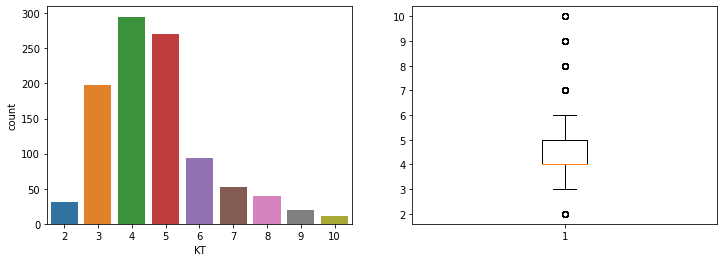

In [ ]:
#distribusi kamar tidur
f= plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['KT'])

f.add_subplot(1,2,2)
plt.boxplot(df['KT'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


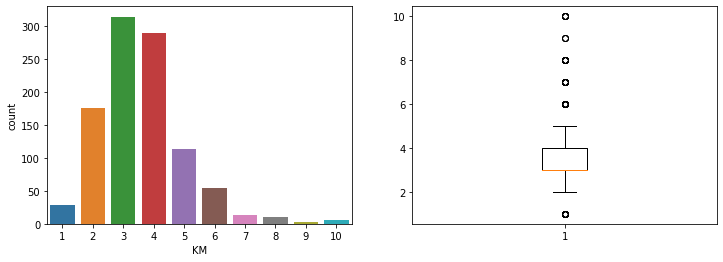

In [ ]:
#distribusi kamar mandi 
f= plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['KM'])

f.add_subplot(1,2,2)
plt.boxplot(df['KM'])
plt.show()

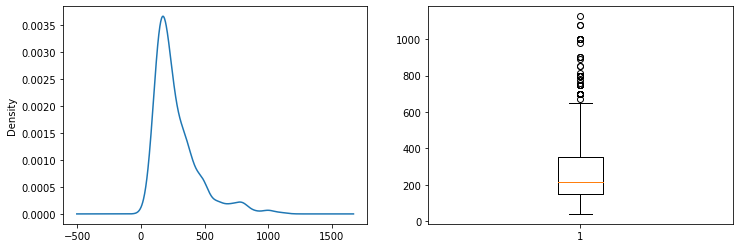

In [ ]:
#distribusi luas bangunan
f= plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['LB'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['LB'])
plt.show()

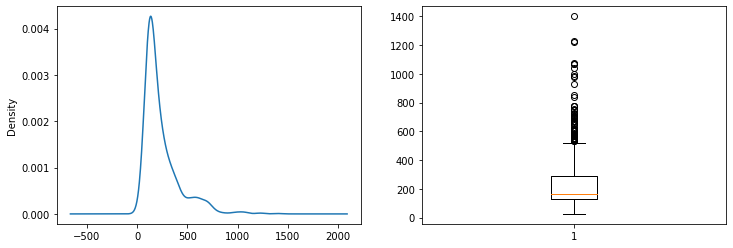

In [ ]:
#distribusi luas tanah
f= plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['LT'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['LT'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


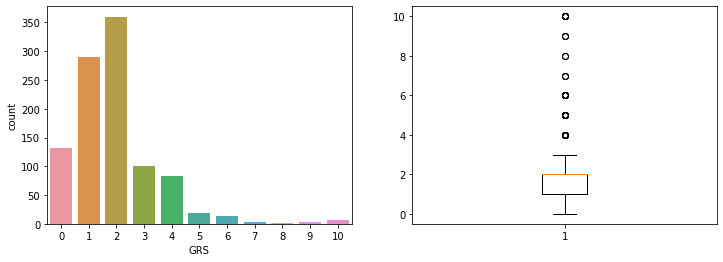

In [ ]:
#distribusi garasi
f= plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['GRS'])

f.add_subplot(1,2,2)
plt.boxplot(df['GRS'])
plt.show()

**HUBUNGAN & KORELASI VARIABEL INDEPENDEN DAN DEPENDEN**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

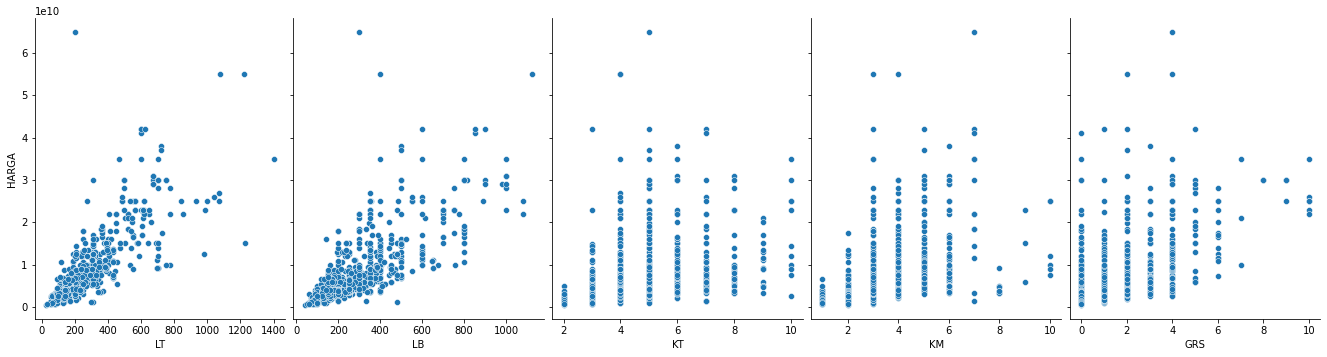

In [ ]:
#hubungan variabel independen dan dependen
f= plt.figure(figsize=(10,8))

sns.pairplot(data=df,x_vars=['LT', 'LB', 'KT', 'KM', 'GRS'],y_vars=['HARGA'], size=5, aspect=0.75)
plt.show()

In [ ]:
#nilai korelasi antar variabel
df.corr().style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,HARGA,LB,LT,KT,KM,GRS
HARGA,1.00,0.75,0.81,0.32,0.40,0.48
LB,0.75,1.00,0.74,0.44,0.53,0.49
LT,0.81,0.74,1.00,0.43,0.39,0.48
KT,0.32,0.44,0.43,1.00,0.67,0.28
KM,0.40,0.53,0.39,0.67,1.00,0.35
GRS,0.48,0.49,0.48,0.28,0.35,1.00


**MODELLING DATA**

**A. Linear Regression**

In [ ]:
#import library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#memanggil dataset dengan kolom yang digunakan
df = pd.read_csv('data_harga_rumah.csv', usecols=['NAMA RUMAH', 'HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS'], encoding='latin-1')

In [ ]:
#melihat data
df.head()

,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [ ]:
#membuat variabel X dan Y

x = df.drop(columns=['HARGA','NAMA RUMAH'])
y = df['HARGA']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=0)


In [ ]:
#mengecek shape dari data training & data testing
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(606, 5)
(404, 5)
(606,)
(404,)


In [ ]:
#membuat object regresi linear
lin_reg = LinearRegression()

In [ ]:
#melatih data dengan data training yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Mencari nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 1.45398380e+05  1.03701720e+07  2.34413821e+07 -3.95811588e+08
  3.22519805e+08  2.63741885e+08]
-829474677.3517113


In [ ]:
# memasukkan nilai ke dalam dataframe
coef_dict = {
    'features': x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,LB,1.038368e+07
1,LT,2.343164e+07
2,KT,-3.962576e+08
3,KM,3.208333e+08
4,GRS,2.656817e+08


dari milai m dan b diatas, kalau dimasukan ke dalam rumus menjadi: Y =1.038368e+07 + 2.343164e+07 + -3.962576e+08 +	3.208333e+08 +	2.656817e+08

In [ ]:
y_pred = lin_reg.predict(x_test)

In [ ]:
# mencari nilai akurasi dari model menggunakan data testing yang sudah displit

lin_reg.score(x_test, y_test)

0.6964531825442918

In [ ]:
# Pengujian Akurasi 

from sklearn.metrics import mean_squared_error, r2_score

print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2: ",r2_score(y_test, y_pred))

RMSE:  4395785322.216207
R2:  0.6964531825442918


**B. Polynomial Regression**

In [ ]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
#memanggil dataset dengan kolom yang digunakan
df = pd.read_csv('data_harga_rumah.csv', usecols=['NAMA RUMAH', 'HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS'], encoding='latin-1')

In [ ]:
#melihat data
df

,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...
1005,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


In [ ]:
#membuat variabel x dan y
x = df.iloc[:, 2:7]
y = df.iloc[:, 2]


In [ ]:
#membagi dataset menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=0)


In [ ]:
#mengecek shape dari data training & data testing
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(606, 5)
(404, 5)
(606,)
(404,)


In [ ]:
# Fitting Linear Regression ke dataset
poly = LinearRegression()
poly.fit(x, y)

LinearRegression()

In [ ]:
# Fitting polynomial regression ke dataset
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)
poly_reg.fit(x_train)
x_train_poly = poly_reg.transform(x_train)
x_test_poly = poly_reg.transform(x_test)

poly = LinearRegression()
poly.fit(x_train_poly, y_train)

y_pred = poly.predict(x_test_poly)

poly.score(x_test_poly, y_test)


0.9999999999954322

In [ ]:
# Pengujian Akurasi  

from sklearn.metrics import mean_squared_error, r2_score

print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2: ",r2_score(y_test, y_pred))

RMSE:  0.00040382440532378013
R2:  0.9999999999954322


**C. Support Vector Regression**

In [ ]:
 # Importing the libraries 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [ ]:
df = pd.read_csv('data_harga_rumah.csv', usecols=['NAMA RUMAH', 'HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS'], encoding='latin-1')

In [ ]:
df.head()

,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [ ]:
# membuat variable x dan y 
X = df.iloc[:, 2:7]
y = df.iloc[:, 2]

In [ ]:
# membuat skalar

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[-0.31803759, -0.09691899, -1.06127231, -0.42830543, -1.27183723],
       [-0.54303923, -0.55836723, -0.42513876, -0.42830543,  0.0524469 ],
       [-0.05366066,  0.06986953, -0.42513876,  0.27623608,  1.37673103],
       ...,
       [-0.7736659 , -0.04132282, -0.42513876,  0.27623608, -0.60969517],
       [ 0.46946815,  2.0490933 ,  1.4832619 ,  0.27623608, -1.27183723],
       [ 0.8069706 ,  1.07060065,  1.4832619 ,  0.27623608,  0.0524469 ]])

In [ ]:
#men-split data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=0)
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
#mengecek shape dari data training & data testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(606, 5)
(404, 5)
(606,)
(404,)


In [ ]:
#akurasi model menggunakan data testing yang sudah di-split

In [ ]:
from sklearn import svm
from sklearn.svm import SVR

svr_rbf = svm.SVR(kernel ='rbf', C=10**3, gamma=0.1)
y_pred = svr_rbf.fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)
svr_rbf.score(X_test,y_test)

0.9727367696636435

In [ ]:
#import library untuk pengujian akurasi R2 dan RMSE

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(X_train)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(X_test)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,LB,LT,KT,KM,GRS
count,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02
mean,9.430484e-17,2.129760e-17,4.955698e-17,-6.137372e-17,4.103795e-17
std,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00
min,-1.397439e+00,-1.198085e+00,-1.733124e+00,-1.835896e+00,-1.236871e+00
25%,-6.912075e-01,-6.226937e-01,-4.332809e-01,-4.195331e-01,-5.873530e-01
50%,-3.410344e-01,-3.897974e-01,-4.332809e-01,-4.195331e-01,6.216509e-02
75%,4.269923e-01,3.308114e-01,2.166405e-01,2.886481e-01,6.216509e-02
max,4.723234e+00,5.377813e+00,3.466247e+00,4.537736e+00,5.258310e+00



                                          Standardardization on Testing set                                          


,LB,LT,KT,KM,GRS
count,404.000000,404.000000,404.000000,404.000000,404.000000
mean,-0.013354,-0.084930,0.002681,0.027462,0.026795
std,1.113381,0.962704,1.054654,1.013898,0.952574
min,-1.303275,-1.170685,-1.733124,-1.835896,-1.236871
25%,-0.750060,-0.640503,-0.433281,-0.419533,-0.587353
50%,-0.394002,-0.482956,-0.433281,-0.419533,0.062165
75%,0.426992,0.155454,0.216640,0.288648,0.062165
max,4.993956,6.336798,3.466247,4.537736,5.258310


In [ ]:
# menghitung r2 dan RMSE
def rsqr_score(test, pred):
    """Calculate R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [ ]:
print_score(y_test, y_pred)

R²: 0.9727367696636435
RMSE: 31.19812999869066

